In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("./data/listings.csv", encoding="utf-8")
data_detailed = pd.read_csv("./data/listings_detailed.csv", encoding="utf-8")

In [2]:
def checkDuplicates(dataset):
    duplicates = dataset.duplicated(keep=False)
    data.drop_duplicates(keep=False, inplace=True)

    if duplicates.any():
        print("Duplicate rows:")
        print(data[duplicates])
    else:
        print("There are no duplicate rows in dataset")

In [3]:
def plotBoxPlotPrice(dataset, title):
    plt.figure(figsize=(12, 8))

    sns.boxplot(
        data=dataset, 
        x="price", 
        y="neighbourhood",
        showfliers=False,  # Opcional: Oculta los valores atípicos para mayor claridad
        palette="viridis"  
    )

    plt.title(title, fontsize=16, weight="bold")
    plt.xlabel("Precio [$ARS]", fontsize=12)
    plt.ylabel("Barrio", fontsize=12)

    plt.yticks(fontsize=10)
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()

In [4]:
def remove_outliers(df, columns, FACTOR=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - FACTOR * IQR
        upper_bound = Q3 + FACTOR * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36807 entries, 0 to 36806
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36807 non-null  int64  
 1   name                            36807 non-null  object 
 2   host_id                         36807 non-null  int64  
 3   host_name                       36807 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   36807 non-null  object 
 6   latitude                        36807 non-null  float64
 7   longitude                       36807 non-null  float64
 8   room_type                       36807 non-null  object 
 9   price                           33851 non-null  float64
 10  minimum_nights                  36807 non-null  int64  
 11  number_of_reviews               36807 non-null  int64  
 12  last_review                     

In [6]:
data_detailed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36807 entries, 11508 to 1230627923522133497
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36807 non-null  object 
 1   listing_url                                   36807 non-null  int64  
 2   scrape_id                                     36807 non-null  object 
 3   last_scraped                                  36807 non-null  object 
 4   source                                        36807 non-null  object 
 5   name                                          35854 non-null  object 
 6   description                                   18340 non-null  object 
 7   neighborhood_overview                         36806 non-null  object 
 8   picture_url                                   36807 non-null  int64  
 9   host_id                                       36

In [7]:
checkDuplicates(data)
checkDuplicates(data_detailed)

There are no duplicate rows in dataset
There are no duplicate rows in dataset


In [8]:
columns_to_check_outliers = ['price']
FACTOR = 1.5

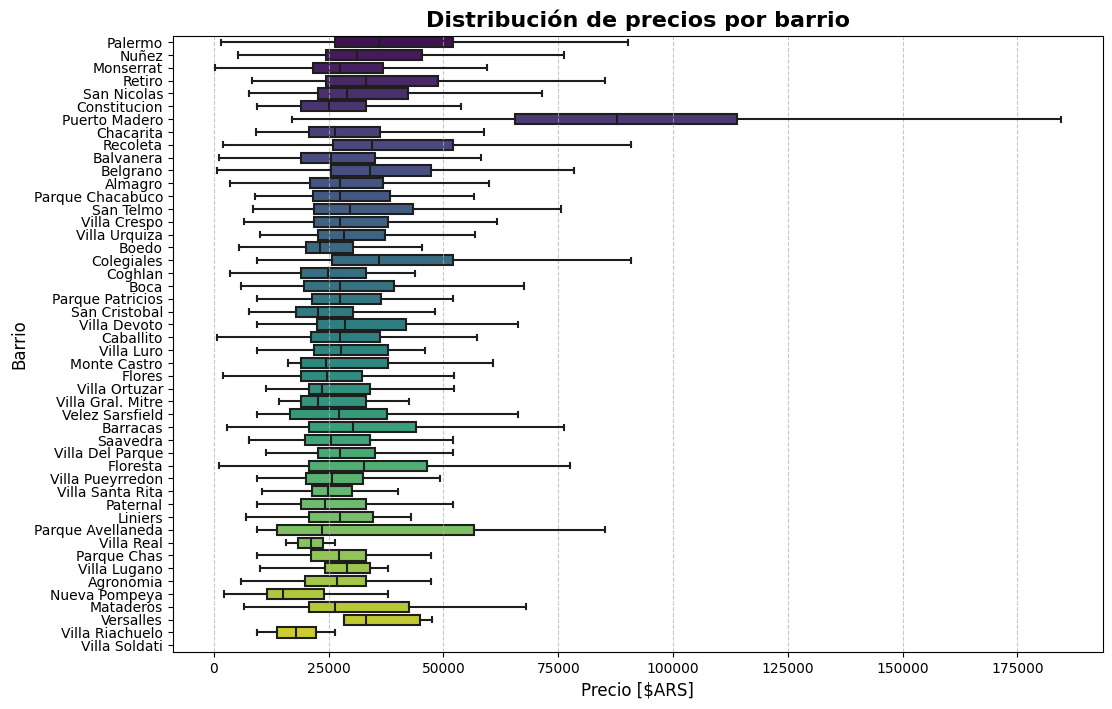

36807 rows before removing price outliers.


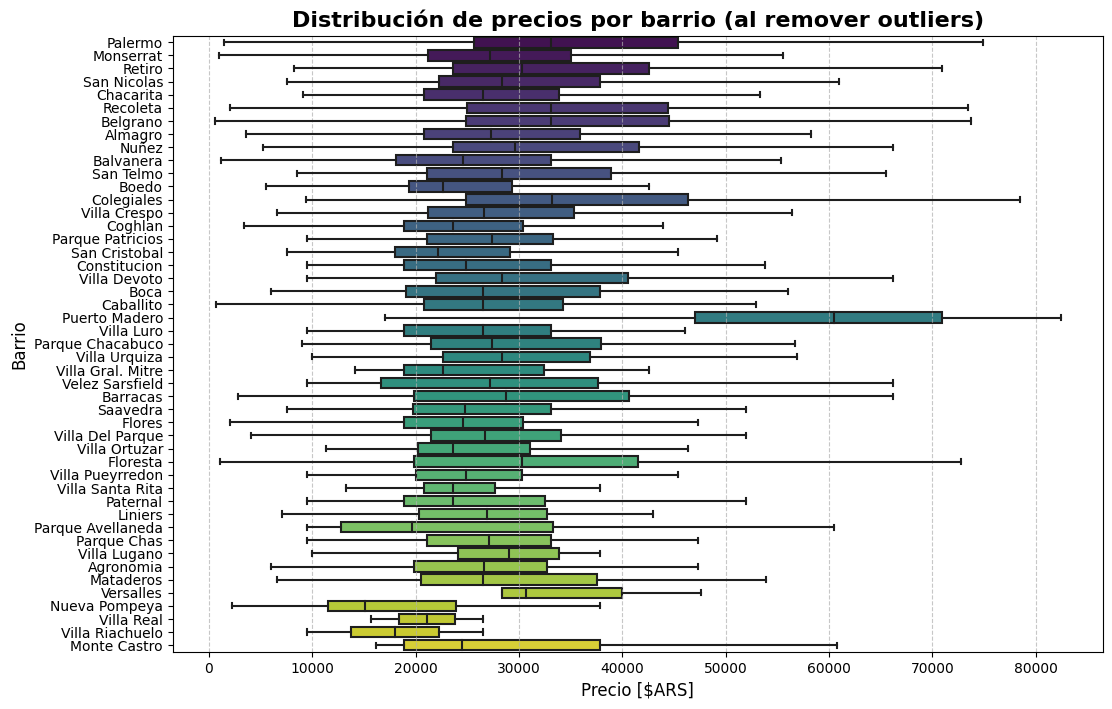

31015 rows after removing price outliers.


In [9]:
plotBoxPlotPrice(data, "Distribución de precios por barrio")
print(f"{len(data)} rows before removing price outliers.")

data = remove_outliers(data, columns_to_check_outliers, FACTOR)
#data_detailed = remove_outliers(data_detailed, columns_to_check_outliers, FACTOR)

plotBoxPlotPrice(data, "Distribución de precios por barrio (al remover outliers)")
print(f"{len(data)} rows after removing price outliers.")

In [10]:
data.to_csv("./output/listings_filtrado.csv")
#data_detailed.to_csv("./output/listings_detailed_filtrado.csv")